## Name: Shivli Mathur
## Reg. no.: 220968298
## Section: DSE-B-B

## Week2: customer_attrition dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('C:\\Users\\Shivli Mathur\\Desktop\\Sem5\\DL Lab\\week2\\customer_attrition.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Preprocessing

In [2]:
#dropping irrelvant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [3]:
#encoding categorical variables

label_encoder_geo = LabelEncoder()
df['Geography'] = label_encoder_geo.fit_transform(df['Geography'])

label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

In [4]:
# checking for null values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
#Defining X and y
X = df.drop('Exited', axis=1)
y = df['Exited']

### Splitting the dataset into train test and validation sets of  (70,15,15)

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [7]:
# Import necessary libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.activations import relu, sigmoid
import matplotlib.pyplot as plt

In [8]:
# Configurations for experiments
hidden_layers_configs = [
    (1, [128]), 
    (2, [128, 64]), 
    (3, [128, 64, 32])
]
epochs_configs = [10, 20, 30]
learning_rates = [0.1, 0.01, 0.001]

# Dictionary to store results
results = {}

### Model creation, compilation and fitting

In [9]:
# Function to create a model with diffrent hyper-parameters
def create_model(hidden_layers, units_per_layer, learning_rate):
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    
    for units in units_per_layer[1:]:
        if units > 0:
            model.add(Dense(units, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=[Accuracy(), Precision(), Recall()])
    
    return model

### Plotting the loss curves

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


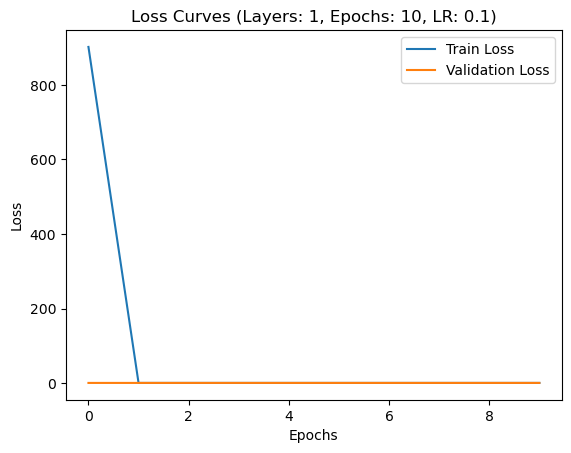

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


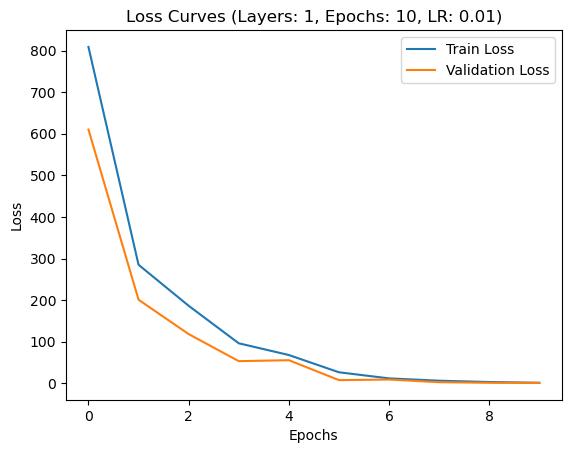

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


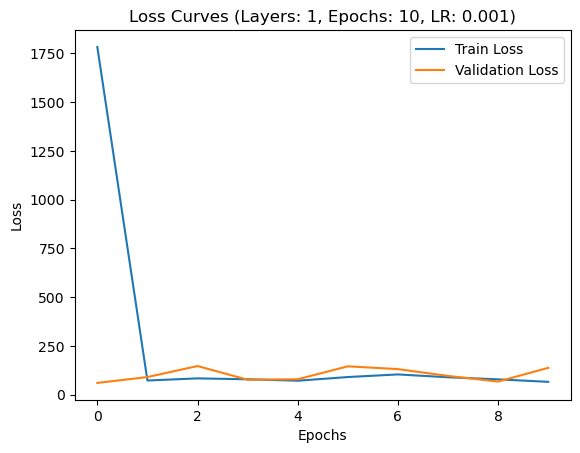

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


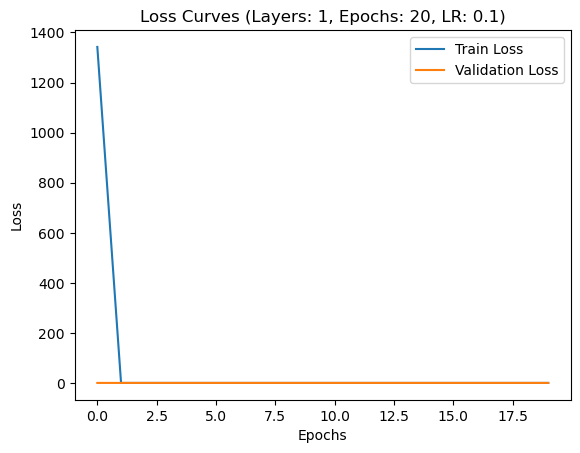

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


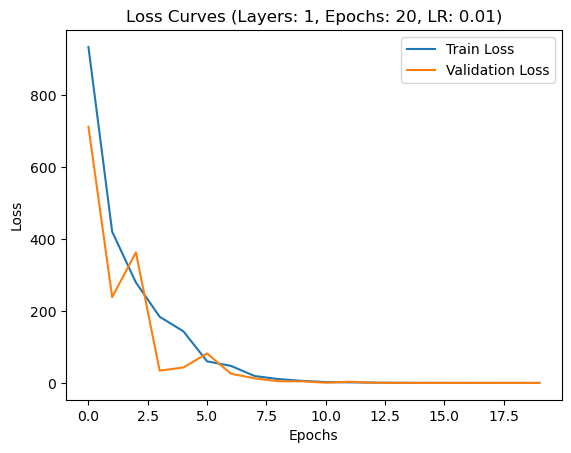

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


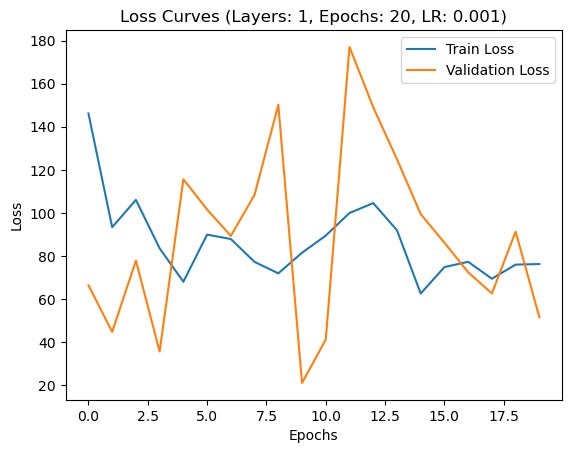

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


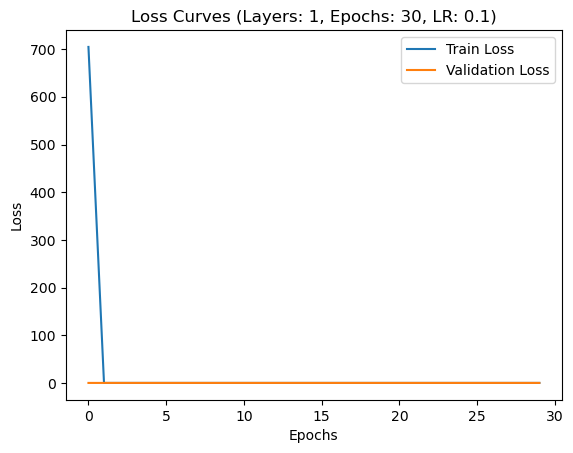

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


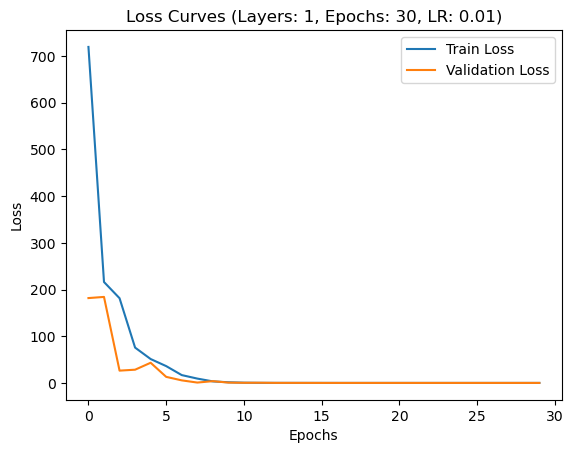

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


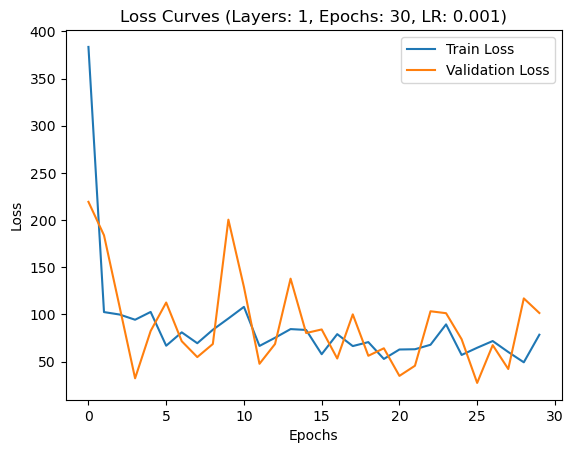

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


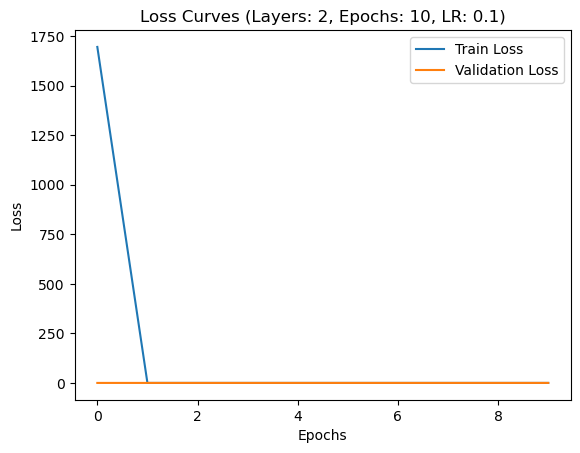

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


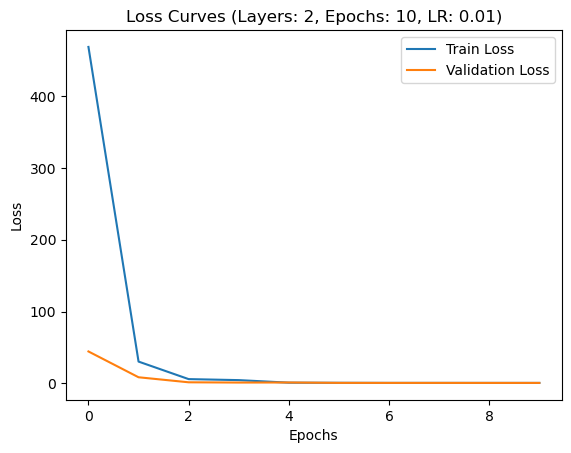

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


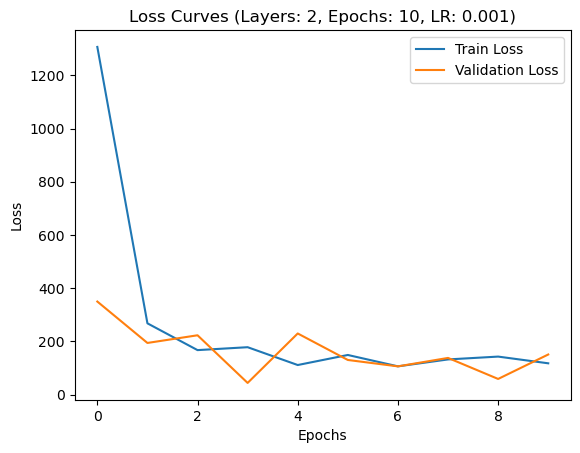

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


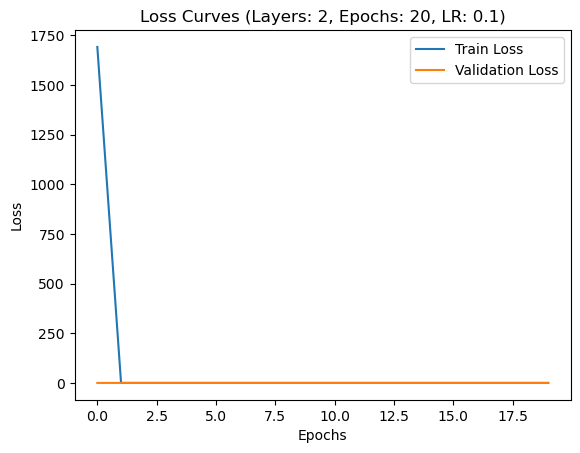

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


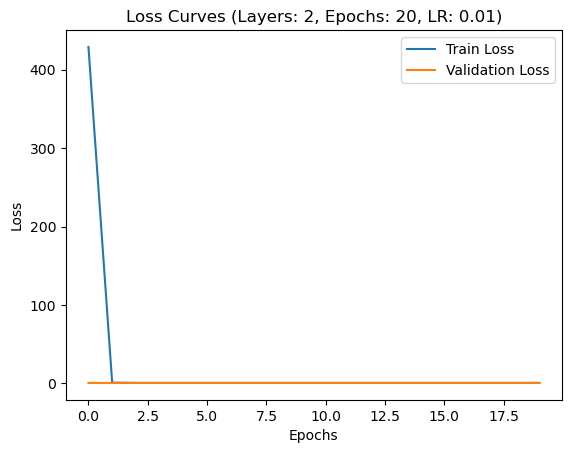

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


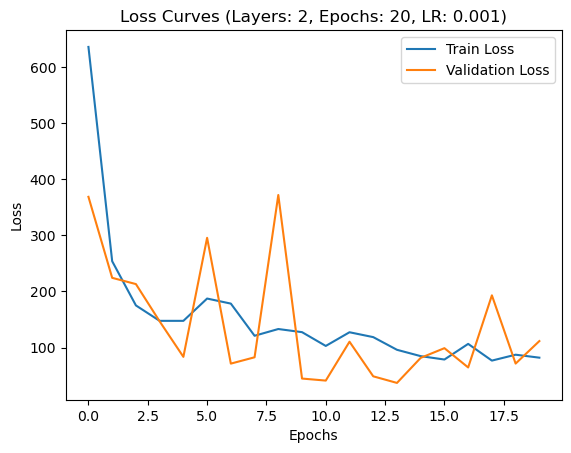

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


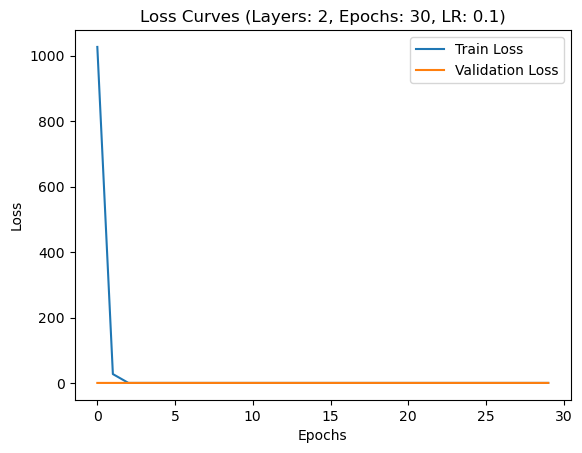

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


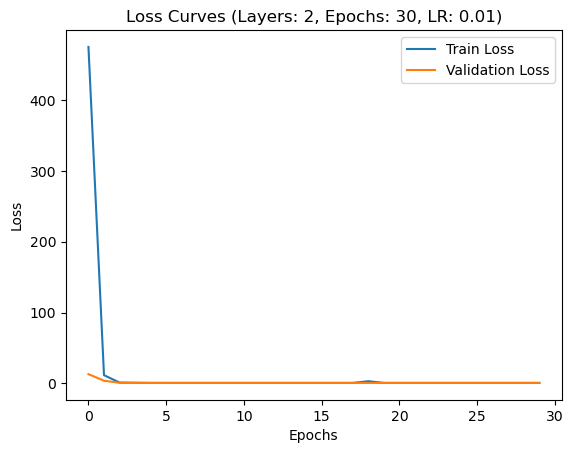

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


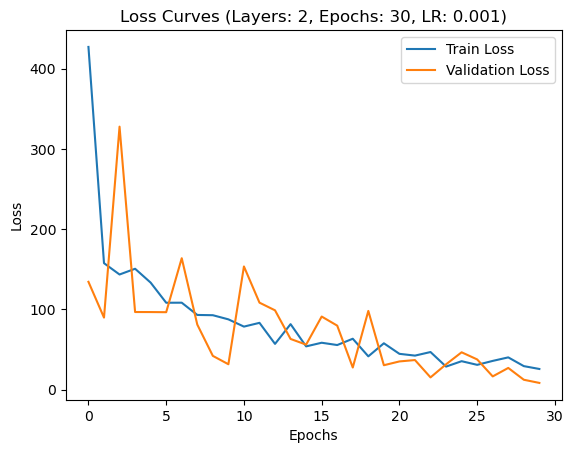

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


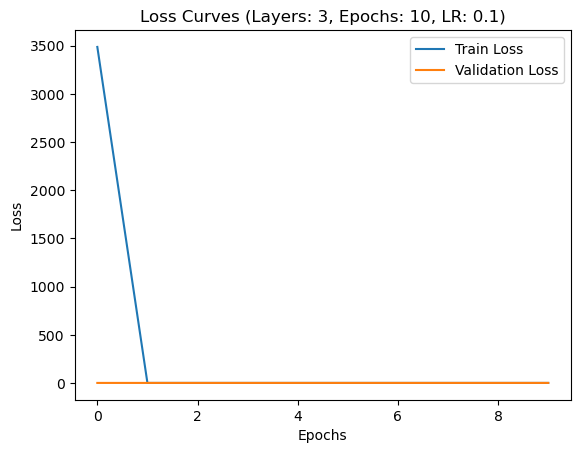

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


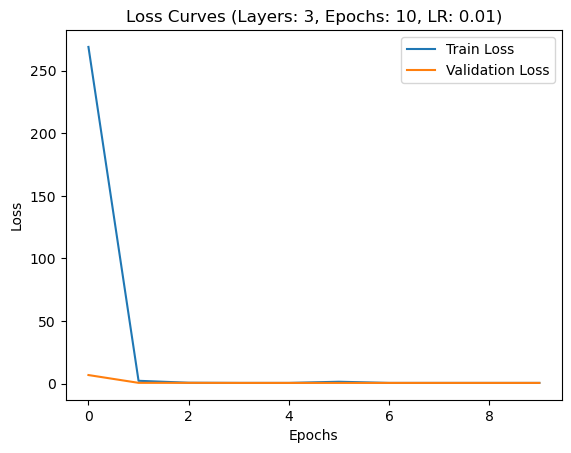

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


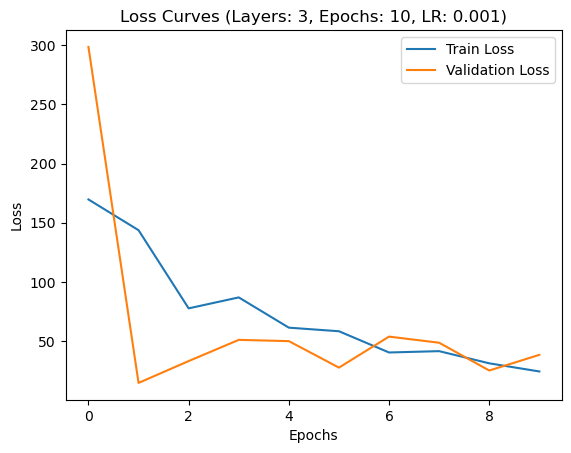

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


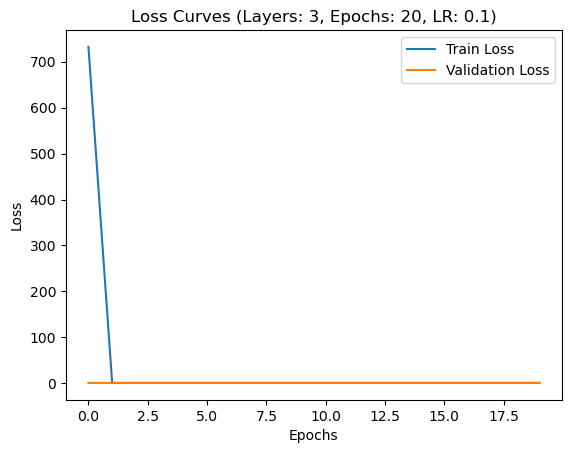

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


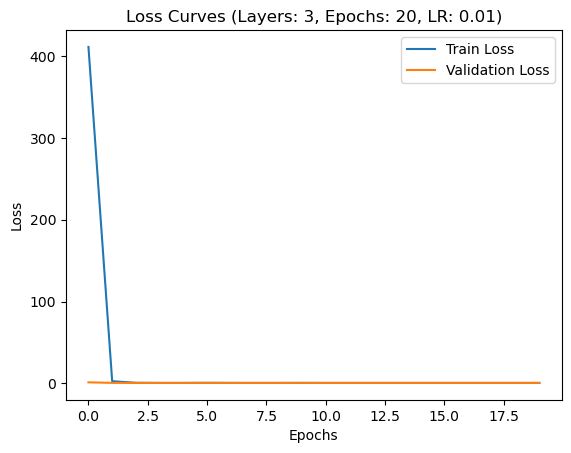

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


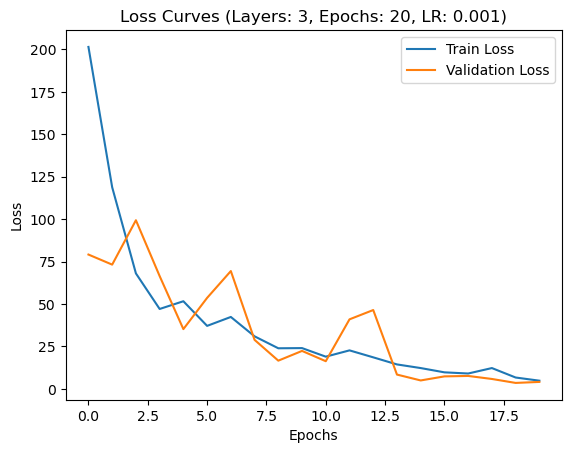

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


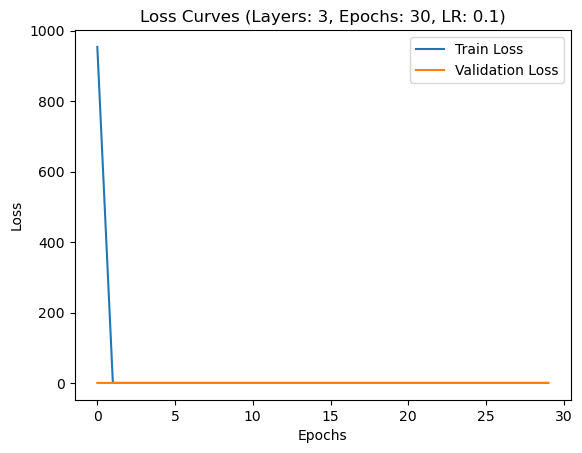

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


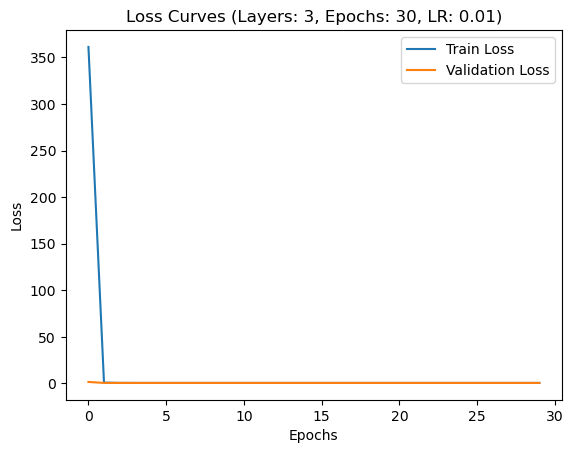

C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


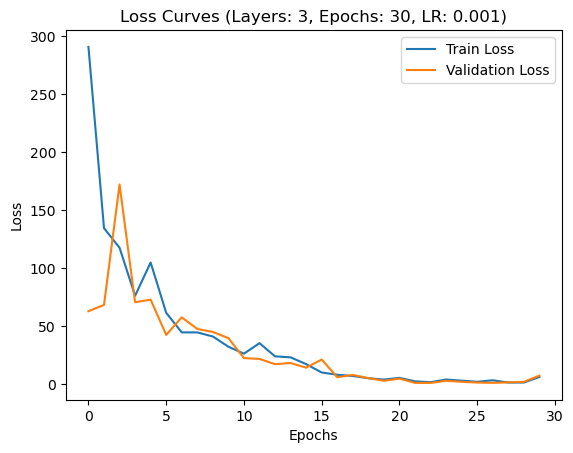

In [10]:

for hidden_layers, units in hidden_layers_configs:
    for epochs in epochs_configs:
        for learning_rate in learning_rates:
            # Create model
            model = create_model(hidden_layers, units, learning_rate)
            
            # Training the model
            history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
            
            # Evaluate model
            loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
            
            # Store results
            results[(hidden_layers, epochs, learning_rate)] = (accuracy, precision, recall)
            
            # Plot loss curves
            plt.figure()
            plt.plot(history.history['loss'], label='Train Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f'Loss Curves (Layers: {hidden_layers}, Epochs: {epochs}, LR: {learning_rate})')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()

### Tabulating the metrics

In [11]:
from tabulate import tabulate

# Preparing data for tabulation
table_data = []

for key, value in results.items():
    hidden_layers, epochs, learning_rate = key
    accuracy, precision, recall = value
    table_data.append([hidden_layers, epochs, learning_rate, accuracy, precision, recall])

# Displaying the table
headers = ["Hidden Layers", "Epochs", "Learning Rate", "Accuracy", "Precision", "Recall"]
print(tabulate(table_data, headers=headers, floatfmt=".4f"))


  Hidden Layers    Epochs    Learning Rate    Accuracy    Precision    Recall
---------------  --------  ---------------  ----------  -----------  --------
              1        10           0.1000      0.0000       0.0000    0.0000
              1        10           0.0100      0.0000       0.1667    0.0033
              1        10           0.0010      0.4380       0.2371    0.7213
              1        20           0.1000      0.0000       0.0000    0.0000
              1        20           0.0100      0.0000       0.0000    0.0000
              1        20           0.0010      0.5640       0.2500    0.3344
              1        30           0.1000      0.0000       0.0000    0.0000
              1        30           0.0100      0.0000       0.0000    0.0000
              1        30           0.0010      0.5253       0.2979    0.0918
              2        10           0.1000      0.0000       0.0000    0.0000
              2        10           0.0100      0.0000       0.0

### Finding the optimal hyperparameters

In [12]:
# Identify the best model based on the highest accuracy
best_model_key = max(results, key=lambda k: (results[k][0], results[k][1], results[k][2]))
best_model_metrics = results[best_model_key]
best_hidden_layers, best_epochs, best_learning_rate = best_model_key

# Display the best model configuration and its metrics
print(f"Best Model Configuration:")
print(f"Hidden Layers: {best_hidden_layers}")
print(f"Epochs: {best_epochs}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Metrics - Accuracy: {best_model_metrics[0]:.4f}, Precision: {best_model_metrics[1]:.4f}, Recall: {best_model_metrics[2]:.4f}")


Best Model Configuration:
Hidden Layers: 2
Epochs: 20
Learning Rate: 0.001
Metrics - Accuracy: 0.7740, Precision: 0.0000, Recall: 0.0000
